<a href="https://colab.research.google.com/github/Mithun-mondol/Python/blob/main/Assignment_06_Introduction_to_Machine_Learning_Skill_Morph.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [58]:
print("Welcome to Cancer Detection with Skill Morph!")
print("We will build a Skill Moprh Doctor to detect breast cancer!")

Welcome to Cancer Detection with Skill Morph!
We will build a Skill Moprh Doctor to detect breast cancer!


# **Introduction**

In [59]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score, confusion_matrix, classification_report,
    precision_score, recall_score, f1_score,
    roc_curve, roc_auc_score, auc
)
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman', 'DejaVu Serif', 'Computer Modern Roman'] # Prioritize Times New Roman

# Load the dataset

In [60]:
print("Reading the real cancer dataset...")
from google.colab import drive
drive.mount('/content/drive')
import warnings
warnings.filterwarnings('ignore')
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data/Breast_Cancer_Wisconsin_Dataset.csv')

print(f"Dataset loaded! We have data from {len(data)} real patients")
print(f"Each patient has {len(data.columns)-2} medical measurements")

# Show first few patients
print("\nFirst 5 patients in our dataset:")
print(data[['id', 'diagnosis', 'radius_mean', 'texture_mean', 'area_mean']].head())

# Understand diagnosis column
print(f"\nUnderstanding Diagnosis:")
diagnosis_counts = data['diagnosis'].value_counts()
print(f"M (Malignant = Dangerous Cancer):  {diagnosis_counts['M']} patients")
print(f"B (Benign = Harmless Cancer):      {diagnosis_counts['B']} patients")
print(f"Total patients:                    {len(data)} patients")

Reading the real cancer dataset...
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Dataset loaded! We have data from 569 real patients
Each patient has 31 medical measurements

First 5 patients in our dataset:
         id diagnosis  radius_mean  texture_mean  area_mean
0    842302         M        17.99         10.38     1001.0
1    842517         M        20.57         17.77     1326.0
2  84300903         M        19.69         21.25     1203.0
3  84348301         M        11.42         20.38      386.1
4  84358402         M        20.29         14.34     1297.0

Understanding Diagnosis:
M (Malignant = Dangerous Cancer):  212 patients
B (Benign = Harmless Cancer):      357 patients
Total patients:                    569 patients


# **Prepare Data**

In [61]:
print("Computers only understand numbers, not letters!")
print("Converting M → 1 (Malignant Cancer) and B → 0 (Benign Cancer)")

# Convert diagnosis to numbers
data['diagnosis_numeric'] = data['diagnosis'].map({'M': 1, 'B': 0})
print("Conversion completed!")

# Select only the most important features (make it simple!)
important_features = [
    'radius_mean',      # Size of tumor
    'texture_mean',     # Surface texture
    'area_mean',        # Area of tumor
    'smoothness_mean',  # How smooth the surface is
    'compactness_mean', # How compact the tumor is
]


# Create simple dataset
X = data[important_features]  # Patient measurements
y = data['diagnosis_numeric']  # Malignant (1) or Benign (0)

print(f"\nData prepared:")
print(f"X (measurements): {X.shape}")
print(f"y (diagnosis): {y.shape}")

Computers only understand numbers, not letters!
Converting M → 1 (Malignant Cancer) and B → 0 (Benign Cancer)
Conversion completed!

Data prepared:
X (measurements): (569, 5)
y (diagnosis): (569,)


# **Train and Test Split**

In [62]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=20
)

print(f"Training: {len(X_train)} patients (computer will learn from these)")
print(f"Testing:  {len(X_test)} patients (computer will be tested on these)")

# Show some training examples
print(f"\n Training Examples (Computer learns from these):")
print(X_train.head())

Training: 455 patients (computer will learn from these)
Testing:  114 patients (computer will be tested on these)

 Training Examples (Computer learns from these):
     radius_mean  texture_mean  area_mean  smoothness_mean  compactness_mean
412        9.397         21.68      268.8          0.07969           0.06053
461       27.420         26.27     2501.0          0.10840           0.19880
532       13.680         16.33      575.5          0.09277           0.07255
495       14.870         20.21      680.9          0.09587           0.08345
13        15.850         23.95      782.7          0.08401           0.10020


# **Train with Decision Tree**

In [63]:
# Create our Skill Morph model
skillmorph_doctor = DecisionTreeClassifier(
    max_depth=4,  # Keep it simple - not too complex
    random_state=20
)

print("Teaching Skill Morph doctor with training data...")
# Train the model
skillmorph_doctor.fit(X_train, y_train)
print("Skill Morph doctor training completed!")

print("\nSkill Morph Doctor has learned to recognize patterns like:")
print("- If tumor radius > 15mm AND texture rough → High malignant cancer risk")
print("- If tumor area small AND smooth → Likely benign cancer")


Teaching Skill Morph doctor with training data...
Skill Morph doctor training completed!

Skill Morph Doctor has learned to recognize patterns like:
- If tumor radius > 15mm AND texture rough → High malignant cancer risk
- If tumor area small AND smooth → Likely benign cancer


# **Test our Skill Morph Doctor**

In [64]:

print("Now let's see how good our Skill Morph doctor is...")
print("Testing on patients it has NEVER seen before!")

# Make predictions
predictions = skillmorph_doctor.predict(X_test)
prediction_probabilities = skillmorph_doctor.predict_proba(X_test)[:, 1]  # Probability of malignant cancer (class 1)
print("Skill Morph doctor made predictions for all test patients!")
print(f"Note: We also got probability scores (confidence levels) for each prediction!")

# Calculate accuracy
accuracy = accuracy_score(y_test, predictions)
print(f"\nSkill Morph Doctor Accuracy: {accuracy:.3f} ({accuracy*100:.1f}%)")

if accuracy > 0.95:
    print("EXCELLENT! Our Skill Morph doctor is very accurate!")
elif accuracy > 0.90:
    print("GOOD! Our Skill Morph doctor performs well!")
elif accuracy > 0.80:
    print("OK! Our Skill Morph doctor is decent!")
else:
    print("Needs improvement...")

# Show some predictions vs reality with confidence
print(f"\nLet's check some predictions with confidence:")
print("Patient | Actual      | Skill Morph Predicted | Confidence | Correct?")
print("-" * 70)

for i in range(10):
    actual = "Malignant" if y_test.iloc[i] == 1 else "Benign"
    predicted = "Malignant" if predictions[i] == 1 else "Benign"
    confidence = prediction_probabilities[i] * 100 if predictions[i] == 1 else (1 - prediction_probabilities[i]) * 100
    correct = "✅" if y_test.iloc[i] == predictions[i] else "❌"
    print(f"{i+1:7} | {actual:11} | {predicted:21} | {confidence:8.1f}%  | {correct}")

Now let's see how good our Skill Morph doctor is...
Testing on patients it has NEVER seen before!
Skill Morph doctor made predictions for all test patients!
Note: We also got probability scores (confidence levels) for each prediction!

Skill Morph Doctor Accuracy: 0.904 (90.4%)
GOOD! Our Skill Morph doctor performs well!

Let's check some predictions with confidence:
Patient | Actual      | Skill Morph Predicted | Confidence | Correct?
----------------------------------------------------------------------
      1 | Benign      | Benign                |     77.8%  | ✅
      2 | Malignant   | Malignant             |    100.0%  | ✅
      3 | Malignant   | Malignant             |    100.0%  | ✅
      4 | Benign      | Benign                |     94.9%  | ✅
      5 | Malignant   | Benign                |    100.0%  | ❌
      6 | Malignant   | Malignant             |    100.0%  | ✅
      7 | Malignant   | Malignant             |    100.0%  | ✅
      8 | Benign      | Benign                | 

# Confusion Matrix

Confusion Matrix (Mistake Analysis):
[[62  4]
 [ 7 41]]

How to read Confusion Matrix:

                 Skill Morph Predicted
              Benign   Malignant
Real Benign     62        4   ← 4 False Alarms (predicted malignant but was benign)
Real Malignant  7        41   ← 7 Missed Malignant (predicted benign but was malignant) ⚠️

✅ Correct Predictions: 103
❌ Wrong Predictions: 11

⚠️ DANGER: Missing malignant cancer (7 cases) is more dangerous than false alarms (4 cases)



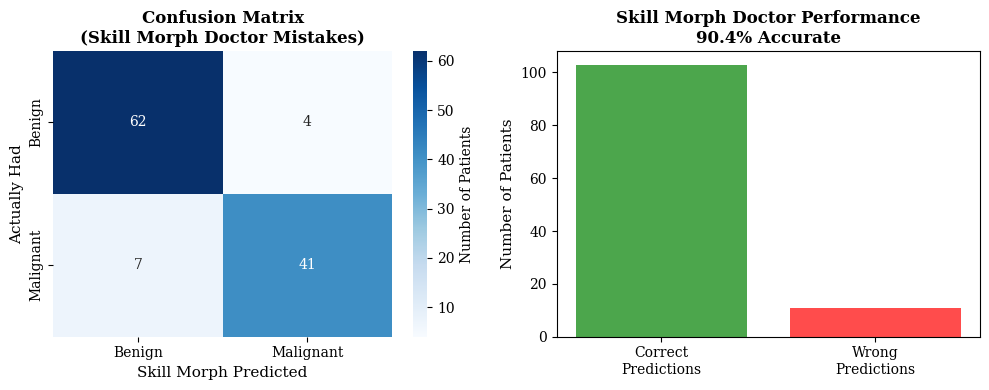

In [65]:
# Calculate confusion matrix
cm = confusion_matrix(y_test, predictions)
print("Confusion Matrix (Mistake Analysis):")
print(cm)

print("\nHow to read Confusion Matrix:")
print(f"""
                 Skill Morph Predicted
              Benign   Malignant
Real Benign     {cm[0,0]}        {cm[0,1]}   ← {cm[0,1]} False Alarms (predicted malignant but was benign)
Real Malignant  {cm[1,0]}        {cm[1,1]}   ← {cm[1,0]} Missed Malignant (predicted benign but was malignant) ⚠️

✅ Correct Predictions: {cm[0,0] + cm[1,1]}
❌ Wrong Predictions: {cm[0,1] + cm[1,0]}

⚠️ DANGER: Missing malignant cancer ({cm[1,0]} cases) is more dangerous than false alarms ({cm[0,1]} cases)
""")

# Create beautiful confusion matrix plot
plt.figure(figsize=(10, 4))

# Confusion Matrix Plot
plt.subplot(1, 2, 1)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Benign', 'Malignant'],
            yticklabels=['Benign', 'Malignant'],
            cbar_kws={'label': 'Number of Patients'})
plt.title('Confusion Matrix\n(Skill Morph Doctor Mistakes)', fontweight='bold', fontsize=12)
plt.xlabel('Skill Morph Predicted', fontsize=11)
plt.ylabel('Actually Had', fontsize=11)

# Accuracy visualization
plt.subplot(1, 2, 2)
categories = ['Correct\nPredictions', 'Wrong\nPredictions']
values = [cm[0,0] + cm[1,1], cm[0,1] + cm[1,0]]
colors = ['green', 'red']
plt.bar(categories, values, color=colors, alpha=0.7)
plt.title(f'Skill Morph Doctor Performance\n{accuracy*100:.1f}% Accurate', fontweight='bold', fontsize=12)
plt.ylabel('Number of Patients', fontsize=11)

plt.tight_layout()
plt.show()

# **Detailed Performance**

 MEDICAL EVALUATION METRICS EXPLAINED:

Think of Skill Morph as a detective looking for malignant cancer:

1️⃣ ACCURACY = Overall correctness
   → How many total cases did we get right?

2️⃣ PRECISION = When we say "MALIGNANT", how often are we right?
   → Of all "malignant" predictions, how many were actually malignant?
   → High precision = Few false alarms

3️⃣ RECALL  = Of all actual malignant cancer cases, how many did we catch?
   → Did we miss any malignant cancer patients?
   → High recall = We don't miss malignant cancer cases

4️⃣ F1-SCORE = Balance between Precision and Recall
   → Perfect balance between avoiding false alarms and catching all malignant cancers



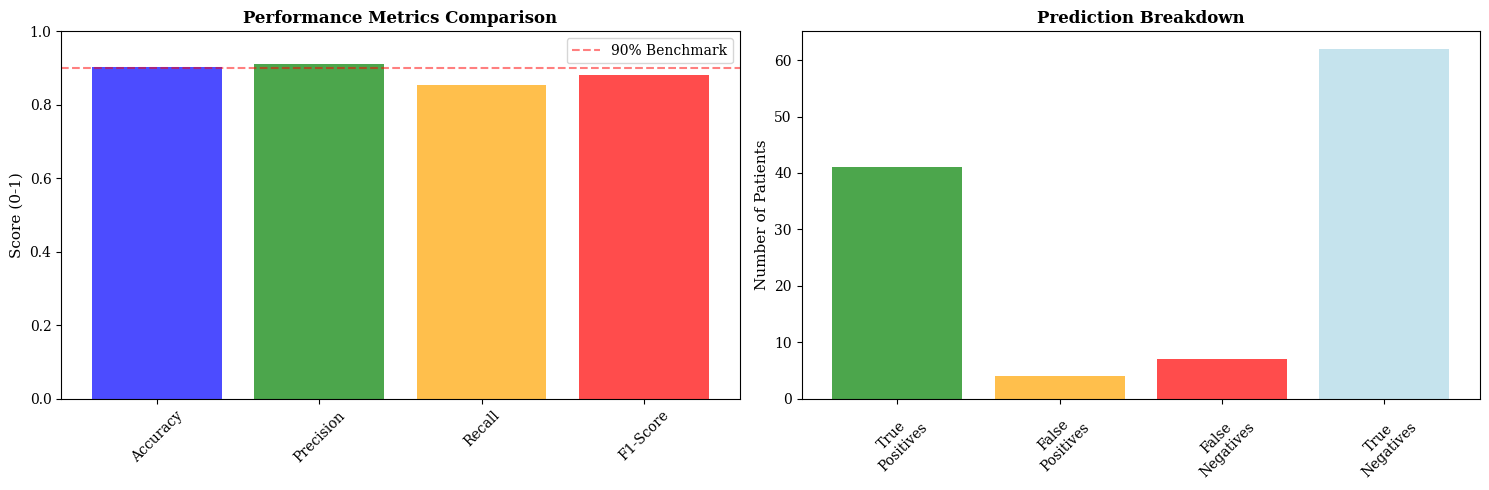

In [66]:
print(""" MEDICAL EVALUATION METRICS EXPLAINED:

Think of Skill Morph as a detective looking for malignant cancer:

1️⃣ ACCURACY = Overall correctness
   → How many total cases did we get right?

2️⃣ PRECISION = When we say "MALIGNANT", how often are we right?
   → Of all "malignant" predictions, how many were actually malignant?
   → High precision = Few false alarms

3️⃣ RECALL  = Of all actual malignant cancer cases, how many did we catch?
   → Did we miss any malignant cancer patients?
   → High recall = We don't miss malignant cancer cases

4️⃣ F1-SCORE = Balance between Precision and Recall
   → Perfect balance between avoiding false alarms and catching all malignant cancers
""")

# Calculate detailed metrics
accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)
f1 = f1_score(y_test, predictions)


# Create detailed metrics visualization
plt.figure(figsize=(15, 5))

# Subplot 1: Metrics comparison
plt.subplot(1, 2, 1)
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
values = [accuracy, precision, recall, f1]
colors = ['blue', 'green', 'orange', 'red']
bars = plt.bar(metrics, values, color=colors, alpha=0.7)
plt.ylim(0, 1)
plt.title('Performance Metrics Comparison', fontweight='bold', fontsize=12)
plt.ylabel('Score (0-1)', fontsize=11)


# Add benchmark line
plt.axhline(y=0.9, color='red', linestyle='--', alpha=0.5, label='90% Benchmark')
plt.legend()
plt.xticks(rotation=45)



# Subplot 2: Precision vs Recall visualization
plt.subplot(1, 2, 2)
# Create a simple precision-recall visualization
categories = ['True\nPositives', 'False\nPositives', 'False\nNegatives', 'True\nNegatives']
tp, fp, fn, tn = cm[1,1], cm[0,1], cm[1,0], cm[0,0]
counts = [tp, fp, fn, tn]
colors_pr = ['green', 'orange', 'red', 'lightblue']
bars_pr = plt.bar(categories, counts, color=colors_pr, alpha=0.7)
plt.title('Prediction Breakdown', fontweight='bold', fontsize=12)
plt.ylabel('Number of Patients', fontsize=11)

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

ROC CURVE & AUC - ADVANCED EVALUATION


 STEP 9: ROC Curve & AUC - The Ultimate Evaluation

ROC CURVE & AUC EXPLAINED:

ROC = Receiver Operating Characteristic
AUC = Area Under Curve


OUR SKILL MORPH DOCTOR AUC SCORE:
AUC Score: 0.9695 (96.95%)


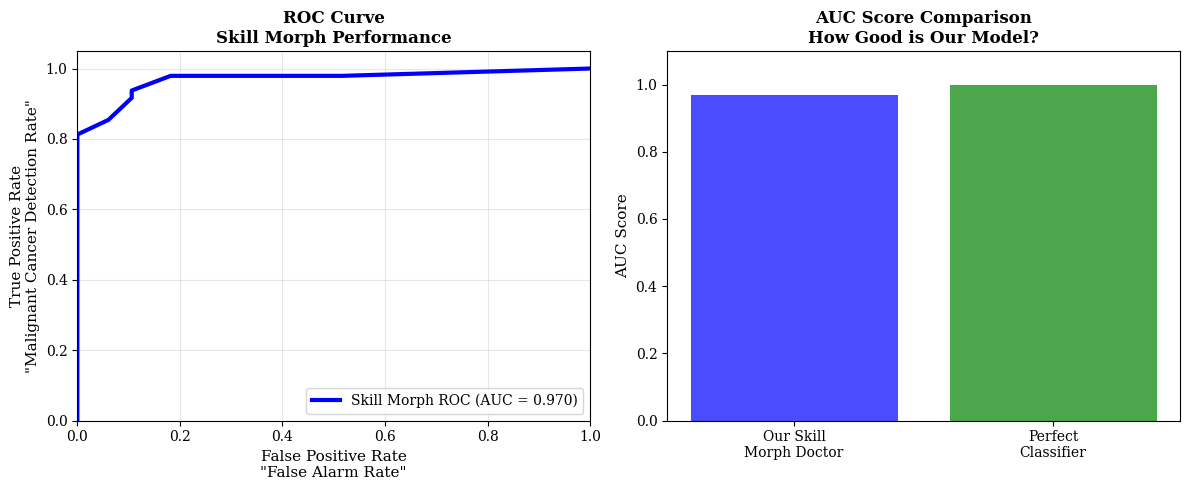

In [67]:
print("\n STEP 9: ROC Curve & AUC - The Ultimate Evaluation")
print("=" * 60)

print("""
ROC CURVE & AUC EXPLAINED:

ROC = Receiver Operating Characteristic
AUC = Area Under Curve

""")

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, prediction_probabilities)
auc_score = roc_auc_score(y_test, prediction_probabilities)

print(f"OUR SKILL MORPH DOCTOR AUC SCORE:")
print(f"{'='*40}")
print(f"AUC Score: {auc_score:.4f} ({auc_score*100:.2f}%)")

# Create comprehensive ROC visualization
plt.figure(figsize=(12, 5))

# Subplot 1: ROC Curve
plt.subplot(1, 2, 1)
plt.plot(fpr, tpr, color='blue', lw=3, label=f'Skill Morph ROC (AUC = {auc_score:.3f})')


plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate\n"False Alarm Rate"', fontsize=11)
plt.ylabel('True Positive Rate\n"Malignant Cancer Detection Rate"', fontsize=11)
plt.title('ROC Curve\nSkill Morph Performance', fontweight='bold', fontsize=12)
plt.legend(loc="lower right")
plt.grid(True, alpha=0.3)

# Subplot 2: AUC Comparison
plt.subplot(1, 2, 2)
model_names = ['Our Skill\nMorph Doctor', 'Perfect\nClassifier']
auc_scores = [auc_score, 1.0]
colors_auc = ['blue', 'green']
bars_auc = plt.bar(model_names, auc_scores, color=colors_auc, alpha=0.7)

plt.ylim(0, 1.1)
plt.ylabel('AUC Score', fontsize=11)
plt.title('AUC Score Comparison\nHow Good is Our Model?', fontweight='bold', fontsize=12)

plt.tight_layout()
plt.show()


# Assignment


Top features that determine cancer:

                 Feature  Importance
28  concave points_worst    0.194718
23       perimeter_worst    0.107308
21          radius_worst    0.097903
8    concave points_mean    0.097871
24            area_worst    0.097376
14               area_se    0.054722
4              area_mean    0.051343
27       concavity_worst    0.037825
3         perimeter_mean    0.031381
7         concavity_mean    0.025794

Best Tree Depth:
Depth: 3, Accuracy: 93.86%
Depth: 4, Accuracy: 93.86%
Depth: 5, Accuracy: 93.86%
Depth: 6, Accuracy: 93.86%
Depth: 7, Accuracy: 94.74%
Depth: 8, Accuracy: 94.74%
Depth: 9, Accuracy: 94.74%
Depth: 10, Accuracy: 94.74%

Best depth found: 7 with accuracy: 94.74%

Materics with best depth 7:
Accuracy: 94.74%
Precision: 95.12%
Recall: 90.70%
F1-Score: 92.86%

Let's check some predictions with confidence:
Patient | Actual      | Predicted Value | Confidence | Correct?
----------------------------------------------------------------------

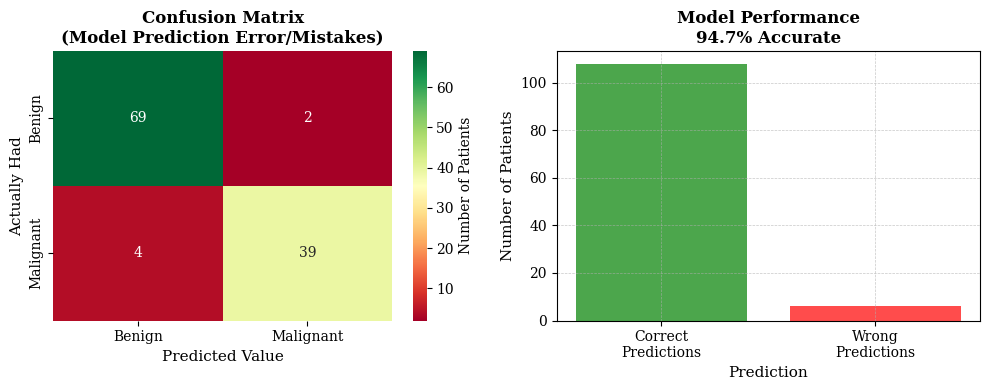

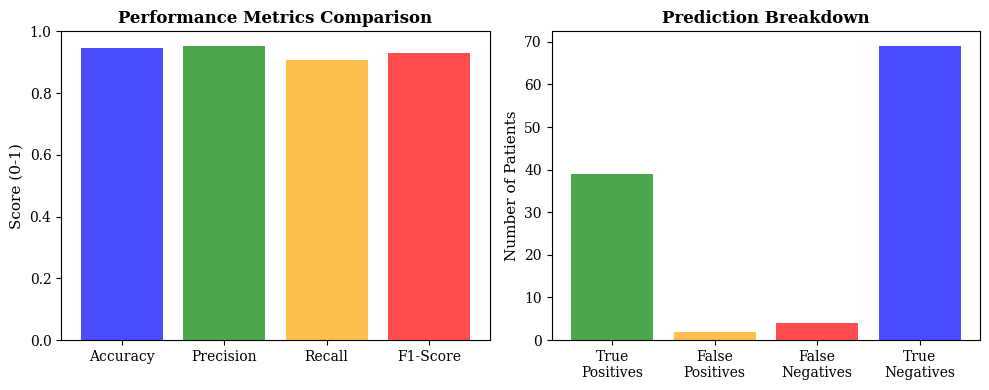


AUC SCORE of OUR MODEL:
AUC Score: 0.9387 (93.87%)


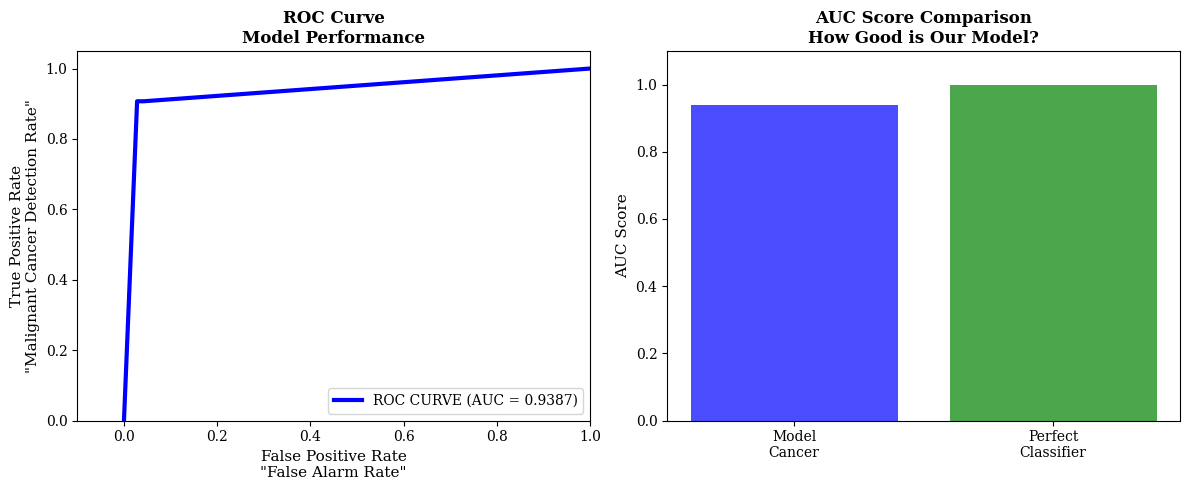

In [68]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import (accuracy_score, confusion_matrix, classification_report,
precision_score, recall_score, f1_score, roc_curve, roc_auc_score, auc)
import matplotlib.pyplot as plt
import seaborn as sns

# Font
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman', 'DejaVu Serif', 'Computer Modern Roman'] # Prioritize Times New Roman


###### Question 1: Find the Best Tree Depth
#     Task: Test depths 3, 4, 5 and find highest accuracy
#     Optional: Feature: 10; test depths 5,6,7,8,9

# Load dataset ----
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data/Breast_Cancer_Wisconsin_Dataset.csv')

# Convert diagnosis (M=1, B=0)
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})

# Split data into features (X) and target (y)
x = df.drop(columns = 'diagnosis')
y = df['diagnosis']

# Split data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

# Train a Ramdom Forest Model
model = RandomForestClassifier(random_state = 42)
model.fit(x_train, y_train)

# Get feature importance values
importances = model.feature_importances_
features_names = x.columns

# Create and sort a DataFrame for better readability
feature_importances = pd.DataFrame({'Feature': features_names, 'Importance': importances})
feature_importances = feature_importances.sort_values(by = 'Importance', ascending = False)

# Show top ten features
print("\nTop features that determine cancer:\n")
print(feature_importances.head(10))

#Plot the feature importances
"""
plt.figure(figsize = (10, 6))
sns.barplot(x = 'Importance', y = 'Feature', data = feature_importances.head(10))
plt.title('Feature Importance in Random Forest Model')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()
"""

###### Question 2: Calculate All Metrics
x = x[feature_importances['Feature'].head(10)]
y = df['diagnosis']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

# Depths test
print('\nBest Tree Depth:')
depths_to_test = [3, 4, 5, 6, 7, 8, 9, 10]
best_depth = 0
best_accuracy = 0

for depth in depths_to_test:
    model_cancer = DecisionTreeClassifier(random_state = 42, max_depth = depth)
    model_cancer.fit(x_train, y_train)
    predictions = model_cancer.predict(x_test)
    accuracy = accuracy_score(y_test, predictions)
    print(f"Depth: {depth}, Accuracy: {accuracy*100:.2f}%")
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_depth = depth

print(f'\nBest depth found: {best_depth} with accuracy: {best_accuracy*100:.2f}%')

# Train model with best depth
model_cancer = DecisionTreeClassifier(random_state = 42, max_depth = best_depth)
model_cancer.fit(x_train, y_train)

#     Task: Use best depth to calculate precision, recall, F1-score
# Make a prediction
predictions = model_cancer.predict(x_test)
prediction_probabilities = model_cancer.predict_proba(x_test)[:, 1]  # Probability of malignant cancer (class 1)

# Find accuracy, precision, recall and f1 score
accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)
f1 = f1_score(y_test, predictions)

print(f'\nMaterics with best depth {best_depth}:')
print(f"Accuracy: {accuracy*100:.2f}%")
print(f"Precision: {precision*100:.2f}%")
print(f"Recall: {recall*100:.2f}%")
print(f"F1-Score: {f1*100:.2f}%")

###### Question 3: Test on New Patients (y_test data)
# Check values with Actual data vs Predicted data
print(f"\nLet's check some predictions with confidence:")
print("Patient | Actual      | Predicted Value | Confidence | Correct?")
print("-" * 70)

for i in range(10):
    actual = "Malignant" if y_test.iloc[i] == 1 else "Benign"
    predicted = "Malignant" if predictions[i] == 1 else "Benign"
    confidence = prediction_probabilities[i] * 100 if predictions[i] == 1 else (1 - prediction_probabilities[i]) * 100
    correct = "   ✅" if y_test.iloc[i] == predictions[i] else "   ❌"
    print(f"{i+1:4}    | {actual:11} | {predicted:15} | {confidence:8.1f}%  | {correct}")

###### Question 4: Analyze Confusion Matrix
#confusion matrix
cm = confusion_matrix(y_test, predictions)
print("Confusion Matrix (Mistake Analysis):")
print(cm)

print("\nHow to read Confusion Matrix:")
print(f"""
               Predicted Value
               Benign   Malignant
Real Benign      {cm[0,0]}        {cm[0, 1]}    <--  {cm[0,1]} False Alarms (predicted malignant but was benign)
Real Malignant   {cm[1,0]}        {cm[1,1]}    <--  {cm[1,0]} Missed Malignant (predicted benign but was malignant)⚠️

✅ Correct Predictions: {cm[0,0] + cm[1,1]}
❌ Wrong Predictions  :  {cm[0,1] + cm[1,0]}

⚠️ DANGER: Missing malignant cancer ({cm[1,0]} cases) is more dangerous than false alarms ({cm[0,1]} cases)
""")

# Create a Plot Size for Confusion Matrix and Accuracy visualization
plt.figure(figsize=(10, 4))

# Plot Confusion Matrix
plt.subplot(1, 2, 1)
sns.heatmap(cm, annot=True, fmt='d', cmap='RdYlGn',
            xticklabels=['Benign', 'Malignant'],
            yticklabels=['Benign', 'Malignant'],
            cbar_kws={'label': 'Number of Patients'})
plt.title('Confusion Matrix\n(Model Prediction Error/Mistakes)', fontweight='bold', fontsize=12)
plt.xlabel('Predicted Value', fontsize=11)
plt.ylabel('Actually Had', fontsize=11)

# Accuracy Visualisation
plt.subplot(1, 2, 2)
categories = ['Correct\nPredictions', 'Wrong\nPredictions']
values = [cm[0,0] + cm[1,1], cm[0,1] + cm[1,0]]
colors = ['green', 'red']
plt.bar(categories, values, color=colors, alpha=0.7)
plt.title(f'Model Performance\n{accuracy*100:.1f}% Accurate', fontweight='bold', fontsize=12)
plt.grid(True, which = 'both', linestyle = '--', linewidth = .5, alpha=0.7)
plt.ylabel('Number of Patients', fontsize=11)
plt.xlabel('Prediction', fontsize=11)

plt.tight_layout()
plt.show()

# Materics Comparision
plt.figure(figsize=(10, 4))

# Subplot 1: Metrics comparison
plt.subplot(1, 2, 1)
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
values = [accuracy, precision, recall, f1]
colors = ['blue', 'green', 'orange', 'red']
bars = plt.bar(metrics, values, color=colors, alpha=0.7)
plt.ylim(0, 1)
plt.title('Performance Metrics Comparison', fontweight='bold', fontsize=12)
plt.ylabel('Score (0-1)', fontsize=11)

# Create a simple precision-recall visualization
plt.subplot(1, 2, 2)
categories = ['True\nPositives', 'False\nPositives', 'False\nNegatives', 'True\nNegatives']
tp, fp, fn, tn = cm[1,1], cm[0,1], cm[1,0], cm[0,0]
counts = [tp, fp, fn, tn]
colors_pr = ['green', 'orange', 'red', 'blue']
bars_pr = plt.bar(categories, counts, color=colors_pr, alpha=0.7)
plt.title('Prediction Breakdown', fontweight='bold', fontsize=12)
plt.ylabel('Number of Patients', fontsize=11)

plt.tight_layout()
plt.show()

# Clculate ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, prediction_probabilities)
auc_score = roc_auc_score(y_test, prediction_probabilities)

print(f"\nAUC SCORE of OUR MODEL:")
print(f"{'='*27}")
print(f"AUC Score: {auc_score:.4f} ({auc_score*100:.2f}%)")

# Create ROC Curve Visualisation
plt.figure(figsize=(12, 5))

# Subplot 1: ROC Curve
plt.subplot(1, 2, 1)
plt.plot(fpr, tpr, color='blue', lw=3, label=f'ROC CURVE (AUC = {auc_score:.4f})')
plt.xlim([-0.1, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate\n"False Alarm Rate"', fontsize=11)
plt.ylabel('True Positive Rate\n"Malignant Cancer Detection Rate"', fontsize=11)
plt.title('ROC Curve\nModel Performance', fontweight='bold', fontsize=12)
plt.legend(loc="lower right")

# Subplot 2: AUC Comparision
plt.subplot(1, 2, 2)
model_names = ['Model\nCancer', 'Perfect\nClassifier']
auc_scores = [auc_score, 1.0]
colors_auc = ['blue', 'green']
bars_auc = plt.bar(model_names, auc_scores, color=colors_auc, alpha=0.7)
plt.ylim(0, 1.1)
plt.ylabel('AUC Score', fontsize=11)
plt.title('AUC Score Comparison\nHow Good is Our Model?', fontweight='bold', fontsize=12)

plt.tight_layout()
plt.show()

Dataset loaded successfully!

Top 10 most correlated features:
 ['concave points_worst', 'perimeter_worst', 'concave points_mean', 'radius_worst', 'perimeter_mean', 'area_worst', 'radius_mean', 'area_mean', 'concavity_mean', 'concavity_worst']

Selected features shape: (569, 10)
Train shape: (455, 10), Test shape: (114, 10)

Best Tree Depth:
Depth: 2, Accuracy: 95.61%
Depth: 3, Accuracy: 95.61%
Depth: 4, Accuracy: 95.61%
Depth: 5, Accuracy: 95.61%
Depth: 6, Accuracy: 95.61%
Depth: 7, Accuracy: 95.61%
Depth: 8, Accuracy: 95.61%
Depth: 9, Accuracy: 95.61%
Depth: 10, Accuracy: 95.61%

Best depth found: 2 with accuracy: 95.61%


Model Accuracy with top 10 features:
Accuracy: 95.61%
Precision: 95.24%
Recall: 93.02%
F1-Score: 94.12%


Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.97      0.97        71
           1       0.95      0.93      0.94        43

    accuracy                           0.96       114
   macro avg       

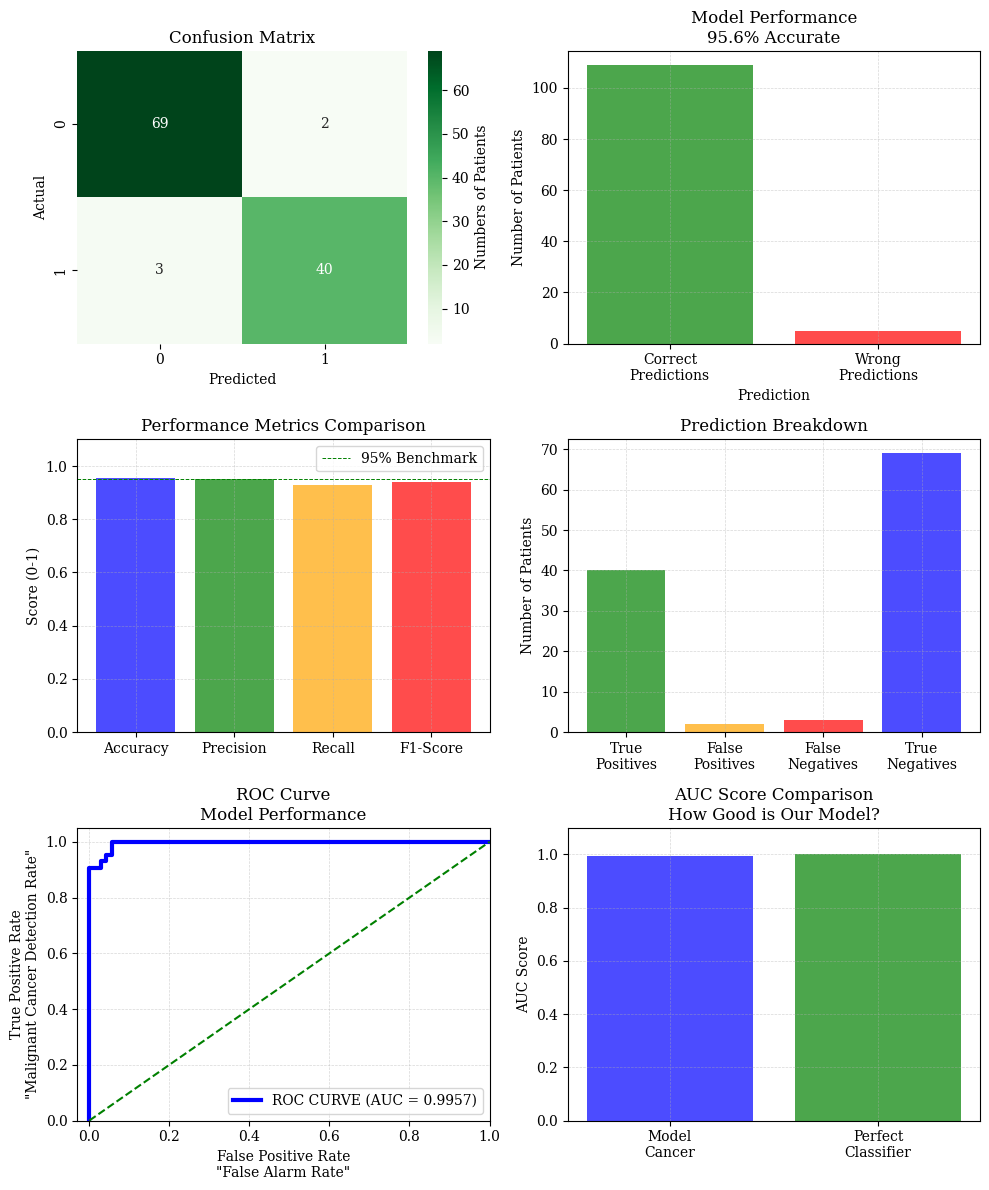

In [71]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data/Breast_Cancer_Wisconsin_Dataset.csv')

# Convert diagnosis (M=1, B=0)
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})

print("Dataset loaded successfully!")
#print(df.head())

# Compute correlation matrix
corr = df.corr(numeric_only=True)

# Get top 10 features most correlated with diagnosis (excluding diagnosis itself)
top_features = corr['diagnosis'].abs().sort_values(ascending=False).head(11).index.tolist()
top_features.remove('diagnosis')  # remove target itself

print("\nTop 10 most correlated features:\n", top_features)

X = df[top_features]
y = df['diagnosis']

print("\nSelected features shape:", X.shape)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

print(f"Train shape: {X_train.shape}, Test shape: {X_test.shape}")

# Find the beat tree depth
print('\nBest Tree Depth:')
depths_to_test = [2, 3, 4, 5, 6, 7, 8, 9, 10]
best_depth = 0
best_accuracy = 0

for depth in depths_to_test:
    model = RandomForestClassifier(random_state = 42, max_depth = depth)
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    print(f"Depth: {depth}, Accuracy: {accuracy*100:.2f}%")
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_depth = depth
print(f'\nBest depth found: {best_depth} with accuracy: {best_accuracy*100:.2f}%')

#Train the model with best Depth
model = RandomForestClassifier(max_depth = best_depth, random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)
pre_proba = model.predict_proba(X_test)[:, 1]

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print(f"""
\nModel Accuracy with top 10 features:
Accuracy: {accuracy*100:.2f}%
Precision: {precision*100:.2f}%
Recall: {recall*100:.2f}%
F1-Score: {f1*100:.2f}%
""")

# Detailed report
details_report = classification_report(y_test, y_pred)
print("\nClassification Report:\n", details_report)

# Calculate ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, pre_proba)
auc_score = roc_auc_score(y_test, pre_proba)

print(f"\nAUC SCORE of OUR MODEL:")
print(f"{'='*27}")
print(f"AUC Score: {auc_score:.4f} ({auc_score*100:.2f}%)")

# <-------------------- Graph Plot ------------------>
# Plot Size
plt.figure(figsize=(10, 12))

# Confusion Matrix
plt.subplot(3, 2, 1)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot = True, fmt = 'd', cmap = 'Greens', cbar_kws = {'label': 'Numbers of Patients'})
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")

# Accuracy
plt.subplot(3, 2, 2)
categories = ['Correct\nPredictions', 'Wrong\nPredictions']
values = [cm[0,0] + cm[1,1], cm[0,1] + cm[1,0]]
colors = ['green', 'red']
plt.bar(categories, values, color = colors, alpha = 0.7)
plt.title(f'Model Performance\n{accuracy*100:.1f}% Accurate')
plt.grid(True, which = 'both', linestyle = '--', linewidth = .5, alpha = 0.5)
plt.ylabel('Number of Patients')
plt.xlabel('Prediction')

# Matrics Comparision
plt.subplot(3, 2, 3)
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
values = [accuracy, precision, recall, f1]
colors = ['blue', 'green', 'orange', 'red']
bars = plt.bar(metrics, values, color = colors, alpha = 0.7)
plt.grid(True, which = 'both', linestyle = '--', linewidth = .5, alpha = 0.5)
plt.ylim(0, 1.1)
plt.title('Performance Metrics Comparison')
plt.ylabel('Score (0-1)')

# Benchmark line
plt.axhline(y = 0.95, color = 'green', linestyle = '--', linewidth = 0.7, label = '95% Benchmark')
plt.legend()

# Precision plot
plt.subplot(3, 2, 4)
categories = ['True\nPositives', 'False\nPositives', 'False\nNegatives', 'True\nNegatives']
tp, fp, fn, tn = cm[1, 1], cm[0, 1], cm[1, 0], cm[0, 0]
counts = [tp, fp, fn, tn]
colors_prec = ['green', 'orange', 'red', 'blue']
bars_prec = plt.bar(categories, counts, color = colors_prec, alpha = 0.7)
plt.grid(True, which = 'both', linestyle = '--', linewidth = .5, alpha = 0.5)
plt.title('Prediction Breakdown')
plt.ylabel('Number of Patients')

# ROC Curve
plt.subplot(3, 2, 5)
plt.plot(fpr, tpr, color='blue', lw=3, label=f'ROC CURVE (AUC = {auc_score:.4f})')
plt.plot([0, 1], [0, 1], color='green', linestyle='--')
plt.grid(True, which = 'both', linestyle = '--', linewidth = .5, alpha = 0.5)
plt.xlim([-0.03, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate\n"False Alarm Rate"')
plt.ylabel('True Positive Rate\n"Malignant Cancer Detection Rate"')
plt.title('ROC Curve\nModel Performance')
plt.legend(loc="lower right")

# AUC Comparision
plt.subplot(3, 2, 6)
model_names = ['Model\nCancer', 'Perfect\nClassifier']
auc_scores = [auc_score, 1.0]
colors_auc = ['blue', 'green']
bars_auc = plt.bar(model_names, auc_scores, color=colors_auc, alpha=0.7)
plt.grid(True, which = 'both', linestyle = '--', linewidth = .5, alpha = 0.5)
plt.ylim(0, 1.1)
plt.ylabel('AUC Score')
plt.title('AUC Score Comparison\nHow Good is Our Model?')

plt.tight_layout()
plt.show()